In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Começamos importando o dataset e imprimindo suas dimensões.


In [33]:
df_classificacao = pd.read_csv("Depression_Dataset.csv")
df_classificacao.shape

(2054, 11)

Depois verificamos se há celulas vazias.

In [34]:
df_classificacao.isna().sum()

,0
Gender,0
Age,0
Work Pressure,0
Job Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Work Hours,0
Financial Stress,0
Family History of Mental Illness,0


In [35]:
df_classificacao.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


Em seguida vamos converter as variaveis categóricas para serem analisadas.
Utilizaremos One-Hot Encoding para variaveis binarias como gender, depression, suicidal thoughts e family history.

In [36]:
# Realizar One-Hot Encoding nas variáveis especificadas
one_hot_columns = ['Gender',
                   'Have you ever had suicidal thoughts ?',
                   'Family History of Mental Illness']

# One-Hot Encoding usando pandas
data_one_hot = pd.get_dummies(df_classificacao, columns=one_hot_columns, drop_first=False)

# Exibir as primeiras linhas do novo dataframe transformado
data_one_hot.head()

,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Work Hours,Financial Stress,Depression,Gender_Female,Gender_Male,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,37,2.0,4.0,7-8 hours,Moderate,6,2,No,True,False,True,False,True,False
1,60,4.0,3.0,5-6 hours,Unhealthy,0,4,No,False,True,False,True,False,True
2,42,2.0,3.0,5-6 hours,Moderate,0,2,No,True,False,True,False,True,False
3,44,3.0,5.0,7-8 hours,Healthy,1,2,No,True,False,False,True,False,True
4,48,4.0,3.0,7-8 hours,Moderate,6,5,No,False,True,False,True,False,True


E por fim comolunas como Sleep Duration	e Dietary Habits ordenaremos por hierarquia.

In [37]:
# Definir as ordens hierárquicas para colunas ordinais
sleep_duration_order = {
    "Less than 5 hours": 1,
    "5-6 hours": 2,
    "7-8 hours": 3,
    "More than 8 hours": 4
}

dietary_habits_order = {
    "Unhealthy": 1,
    "Moderate": 2,
    "Healthy": 3
}

Depression_order = {
    "No": 0,
    "Yes": 1
}

# Converter colunas ordinais
data_one_hot['Sleep Duration'] = data_one_hot['Sleep Duration'].map(sleep_duration_order)
data_one_hot['Dietary Habits'] = data_one_hot['Dietary Habits'].map(dietary_habits_order)
data_one_hot['Depression'] = data_one_hot['Depression'].map(Depression_order)

data_one_hot.head()

,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Work Hours,Financial Stress,Depression,Gender_Female,Gender_Male,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,37,2.0,4.0,3,2,6,2,0,True,False,True,False,True,False
1,60,4.0,3.0,2,1,0,4,0,False,True,False,True,False,True
2,42,2.0,3.0,2,2,0,2,0,True,False,True,False,True,False
3,44,3.0,5.0,3,3,1,2,0,True,False,False,True,False,True
4,48,4.0,3.0,3,2,6,5,0,False,True,False,True,False,True


Com as variaveis categóricas tratadas vamos analisar a matriz de correlação, dando mais atenção a relação com a coluna alvo, depressão.

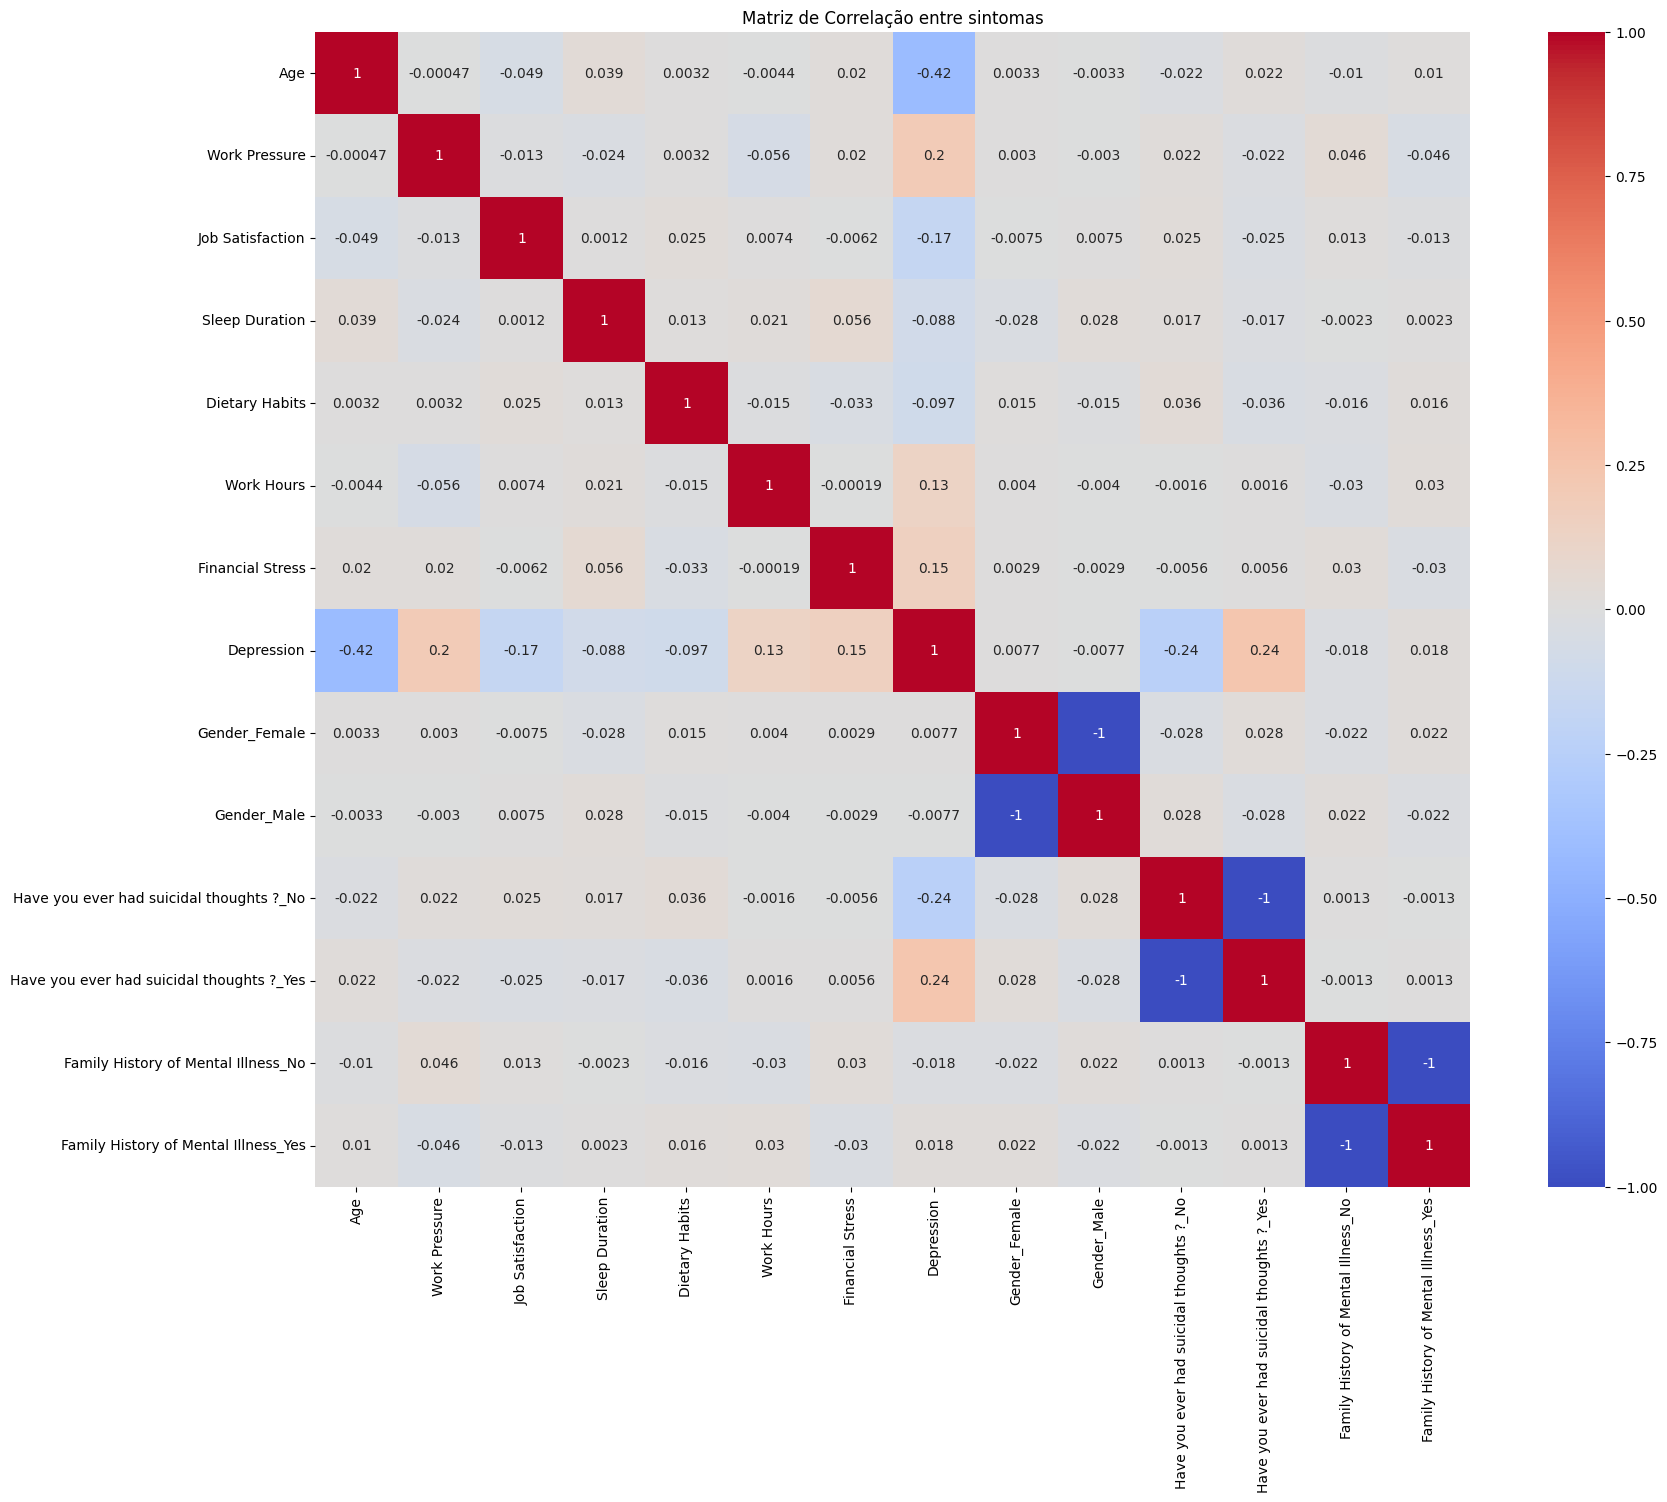

In [38]:
# Calcular a matriz de correlação
correlation_matrix = data_one_hot.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Matriz de Correlação entre sintomas")
plt.show()

As relações mais notaveis foram:


1.   Depressão x Idade: Apresentou a maior correlação com a coluna alvo.
2.   Depressão x Pensamentos Suicidas: Alta taxa de correlação com a coluna alvo.
3.   Depressão x Pressão no Trabalho:Alta taxa de correlação com a coluna alvo.
4.   Depressão x Genero: Apresentou a menor correlação com a coluna alvo.





Para iniciar os treinamentos dos modelos, vamos utilizar o algoritmo KNN

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = data_one_hot.drop(columns=['Depression'])
y = data_one_hot['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       368
           1       0.86      0.44      0.58        43

    accuracy                           0.93       411
   macro avg       0.90      0.72      0.77       411
weighted avg       0.93      0.93      0.92       411



O KNN conseguiu um bom desempenho geral, porém os resultados são mascarados pelo desbalanceamento dos dados, contendo mais amostras de pessoas sem depressão. Seria possivel fazer o balanceamento utilizando tecnicas de oversampling ou undersampling, porém adcionar dados sintéticos poderia influenciar negativamente no treinamento do modelo, e tirar dados de pessoas saudaveis considerando balancear diminuiria em cerca de 5 vezes o tamanho do dataset, o que também não seria interessante.

Considerando essas informações vamos partir para outros modelos como LogisticRegression e RandomForest que permitem configurar pesos para as classes para lidar com o desbalanceamento sem alterar os dados.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Treinar o modelo
model_lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=300)
model_lr.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = model_lr.predict(X_test)

# Avaliar o modelo
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Calcular AUC-ROC
y_probs = model_lr.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC-ROC Score: {auc_score:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       0.98      1.00      0.99        43

    accuracy                           1.00       411
   macro avg       0.99      1.00      0.99       411
weighted avg       1.00      1.00      1.00       411

AUC-ROC Score: 1.00


O algoritmo de regressão logistica apresentou otimos resultados, mas um desempenho alto pode significar que o modelo está em overfitting, para verificar essa hipótese utilizaremos validação cruzada.

In [58]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_lr, X, y, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.2f}")


Cross-validation scores: [0.98543689 0.97087379 0.97572816 0.98058252 0.9804878  0.97560976
 0.9902439  0.97560976 0.9902439  0.9902439 ]
Mean accuracy: 0.98


O fato de a precisão ser alta e consistente (sem grandes variações) entre as diferentes divisões do conjunto de dados sugere que o modelo está generalizando bem. Isso é um bom sinal de que o modelo não está "decorando" os dados de treino, mas sim aprendendo padrões que se aplicam de forma consistente a diferentes dados.

Vamos comparar a acurácia entre treino e teste.

In [78]:
# Acurácia nos dados de treino
train_accuracy = model_lr.score(X_train, y_train)

# Acurácia nos dados de teste
test_accuracy = model_lr.score(X_test, y_test)

print(f'Treinamento Acurácia: {train_accuracy:.2f}')
print(f'Teste Acurácia: {test_accuracy:.2f}')


Treinamento Acurácia: 0.98
Teste Acurácia: 1.00


Em caso de overfitting a acurácia de teste estaria bem abaixo da acurácia de treino, o que não foi apresentado nessa comparação.

Vamos analisar a curva de aprendizado em relação ao AUC-ROC.

In [79]:
from sklearn.metrics import roc_auc_score

# Calcular AUC-ROC para treino
y_probs_train = model_lr.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_probs_train)

# Calcular AUC-ROC para teste
y_probs_test = model_lr.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_probs_test)

print(f'AUC-ROC (Treinamento): {auc_train:.2f}')
print(f'AUC-ROC (Teste): {auc_test:.2f}')


AUC-ROC (Treinamento): 1.00
AUC-ROC (Teste): 1.00


Overfitting geralmente é indicado quando o modelo tem desempenho muito superior no conjunto de treinamento em comparação com o de teste, e novamente não é isso que está sendo apresentado.

Conclusão, não parece haver overfitting. O modelo de regressão logística apresenta um bom desempenho tanto no conjunto de treinamento quanto no conjunto de teste, com as métricas de AUC-ROC, precisão, recall e F1-score em níveis elevados e consistentes. Além disso, a validação cruzada confirma a estabilidade do modelo.

Embora sempre seja possível que o modelo esteja se ajustando de maneira mais fina a padrões não observados nos dados de teste, com base nas evidências apresentadas (especialmente a validação cruzada e a avaliação consistente de métricas), não há indicações fortes de overfitting. O modelo parece estar generalizando bem para os dados não vistos.

A fim de comparação vamos utilizar outro modelo que também permite configuração de peso para as classes, o RandomForest.

In [70]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=50,  # Número de árvores
                                  class_weight='balanced',  # Ajuste de peso para as classes desbalanceadas
                                  random_state=42, criterion= "entropy")
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calcular AUC-ROC
y_probs_rf = model_rf.predict_proba(X_test)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_probs_rf)
print(f"AUC-ROC Score: {auc_score_rf:.2f}")

cv_scores_rf = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores_rf}")
print(f"Mean accuracy: {cv_scores_rf.mean():.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       368
           1       0.96      0.53      0.69        43

    accuracy                           0.95       411
   macro avg       0.95      0.77      0.83       411
weighted avg       0.95      0.95      0.94       411

AUC-ROC Score: 0.98
Cross-validation scores: [0.95145631 0.94174757 0.95145631 0.95631068 0.94146341 0.94634146
 0.96097561 0.95121951 0.95121951 0.94146341]
Mean accuracy: 0.95


Os resultados gerais foram bons, mas novamente a classe positiva para depressão está com um recall relativamente baixo, para tentar melhorar isso, vamos ajustar os valores do threshold e analisar o impacto.

In [77]:
# Obter as probabilidades para a classe 1 (depressivo)
y_probs_rf = model_rf.predict_proba(X_test)[:, 1]

# Definir um novo limiar (threshold)
threshold = 0.25

# Classificar com o novo limiar
y_pred_threshold = (y_probs_rf >= threshold).astype(int)

# Avaliar o modelo com o novo limiar
print(f"Classification Report with Threshold {threshold}:")
print(classification_report(y_test, y_pred_threshold))

# Definir um novo limiar (threshold)
threshold = 0.2

# Classificar com o novo limiar
y_pred_threshold = (y_probs_rf >= threshold).astype(int)

# Avaliar o modelo com o novo limiar
print(f"Classification Report with Threshold {threshold}:")
print(classification_report(y_test, y_pred_threshold))


Classification Report with Threshold 0.25:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       368
           1       0.73      0.86      0.79        43

    accuracy                           0.95       411
   macro avg       0.85      0.91      0.88       411
weighted avg       0.96      0.95      0.95       411

Classification Report with Threshold 0.2:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       368
           1       0.66      0.98      0.79        43

    accuracy                           0.94       411
   macro avg       0.83      0.96      0.88       411
weighted avg       0.96      0.94      0.95       411



Testando 2 valores diferentes chegamos a uma conclusão para o modelo RandomForest.


1.   Threshold de 0.25: Obteve uma queda significativa na precisão da classe positiva, porém o recall aumentou para 0.86 mantendo um bom valor para f1-score.

2.   Threshold de 0.2: A precisão caiu ainda mais, porém o recall conseguiu valor extremamente alto de 0.98, mantendo os mesmos 0.79 de f1-score.

Em uma situação real utilizando RandomForest, o valor de 0.25 apresentaria um melhor equilibrio entre precisão e recall, porém em um cenário onde se priorizaria identificar o maior numero de casos positivos, o valor de 0.2 seria uma boa escolha, porém isso significaria um aumento significativo no numero de falsos positivos.

